# Constrain Satisfaction Model

<IPython.core.display.Javascript object>


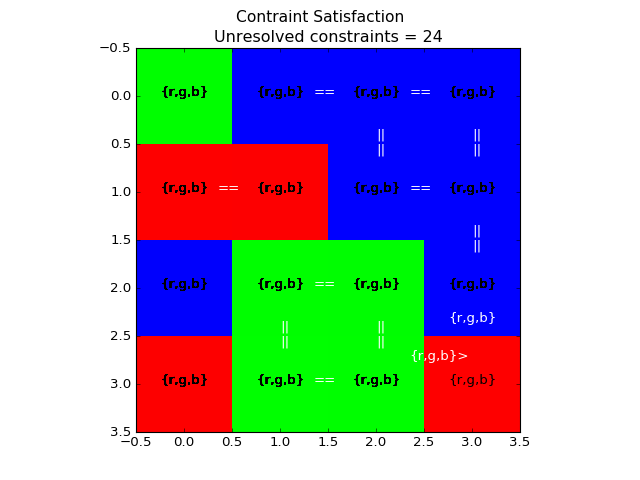

In [5]:
%matplotlib notebook
from ConstraintModel import ConstraintModel        
model = ConstraintModel()
model.ani.save('animation.gif', writer='imagemagick', fps=5)